# Algorithme de calcul Monte Carlo
$\textit{Quentin Chaine}$

## Calcul de $\pi$

Fonction permettant de calculer sur le tirage est dans le cercle et renvoie True si les nombre sont dans le cercle et False sinon:

In [3]:
def est_dans_cercle(a, b, R):
    if (a*a + b*b) <= 1:
        return True
    else:
        return False

Test de la fonction:

In [4]:
a = 1
b = 0.5
r = 1

resultat = est_dans_cercle(a, b, r)
print(resultat)

False


Calcul de $\pi$ en utilisant une méthode de calul Monte Carlo, c'est à dire basée sur le tirage de nombres aléatoires. On tire 2 nombres, ces 2 nombres correspondent au coordonnées x et y dans un espace à 2 dimensions. La surface d'un disque de rayon r est donnée par : $S_{disque} = \pi r^2$. La surface d'un carré de largeur 2r est:$S_{carre} = \frac{r^2}{4}$. Le rapport des 2 surface est donc:

$$ \frac{S_{disque}}{S_{carre}} = \frac{\pi}{4} $$

On peut alors obtenir $\pi$:

$$ \pi = 4 \frac{S_{disque}}{S_{carre}} $$

Le principe de l'estimation de $\pi$ avec la méthode Monte Carlo consiste à tirer 2 nombres aléatoires entre 0 et 1 (tirer un nombre entre 0 et 1 revient à réaliser le calcul sur un quart de cercle, et carré, le calcul revient au même). Ensuite on calcul la position du point avec $x^2 + y^2$. Si on a $x^2 + y^2 \leq 1$ alors le point est dans le cercle sinon il est à l'extérieur. En répétant un grand nombre de fois ce tirage on obtient une estimation de la surface du cercle et du carré. En faisant le rapport des surface et avec un facteur 4 on obtient une estimation de la valeur de $\pi$. 

In [5]:
import numpy as np
from random import random

surface_cercle = 0
tirages = 100000000

for i in range(0, tirages):
    R1 = random()
    R2 = random()

    if est_dans_cercle(R1, R2, 1):
        surface_cercle += 1
pi_estimation = (4*surface_cercle)/tirages
print("La valeur de \u03C0 calculée avec %.0f tirages est %f"%(tirages, pi_estimation))
print("L'écart avec la valeur réelle est: %f %%"%(100*abs(np.pi-pi_estimation)/np.pi))

La valeur de π calculée avec 100000000 tirages est 3.141454
L'écart avec la valeur réelle est: 0.004412 %


On obtient une assez bonne estimation de la valeur de $\pi$ avec un écart avec la valeur réelle inférieur à 0.01%

Visualisation de l'amélioration de la détermination de $\pi$ avec le nombre de tirages qui augmente:

In [4]:
import time
tirages = 5000000

R1 = np.zeros(tirages)
R2 = np.zeros(tirages)
pi_i_quart=np.zeros(tirages)
err_pi_quart = np.zeros(tirages)
t_calcul_quart = np.zeros(tirages)
start_calcul = time.time()

surface_cercle = 0
# Calcul simple
for i in range(0, tirages):
    R1[i] = random()
    R2[i] = random()

    if est_dans_cercle(R1[i], R2[i], 1):
        surface_cercle += 1
    if i > 0:    
       pi_i_quart[i] = 4*surface_cercle/i
       err_pi_quart[i] = (abs(np.pi-pi_i_quart[i])/np.pi)
       t_calcul_quart[i] = time.time() - start_calcul
    

        

Amélioration de la valeur de $\pi$ avec le nombre de tirages:


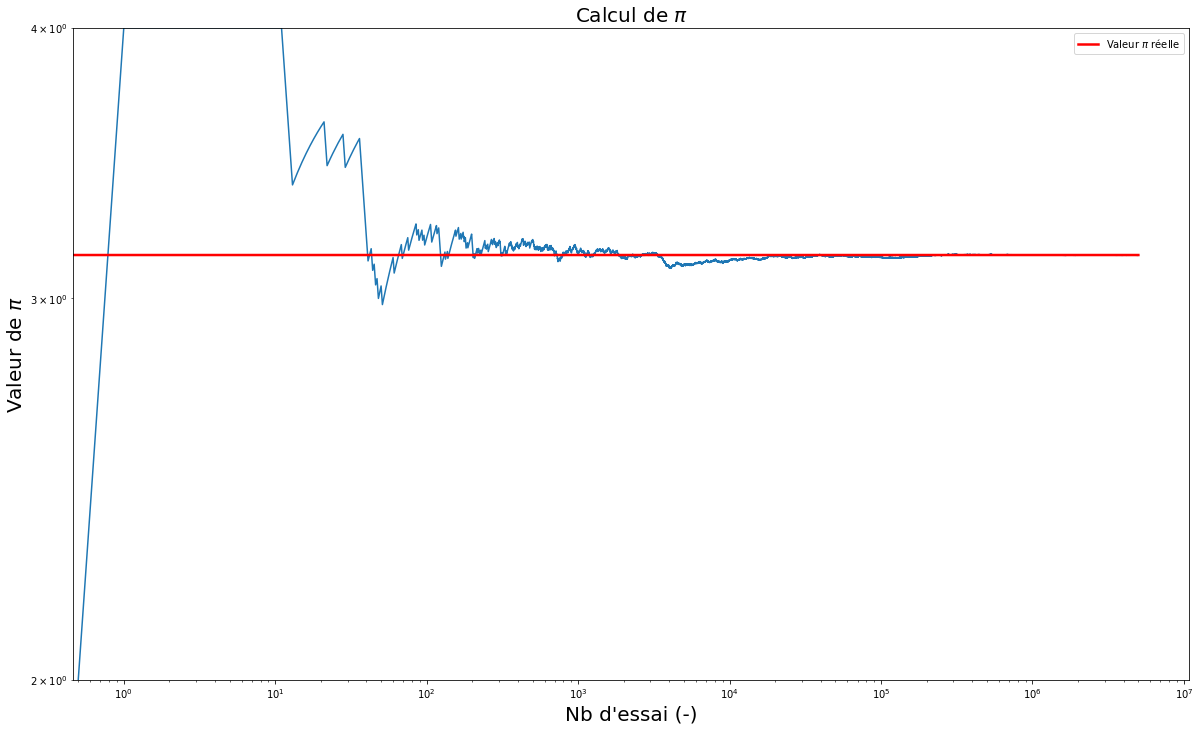

In [5]:
import pylab as pl
import matplotlib.pyplot as plt

x = [i for i in range(tirages)]
PI = [np.pi for i in range(tirages)]

pl.figure(figsize=(20, 12))
plt.plot(x, pi_i_quart)
plt.plot(x, PI, color='red', linewidth=2.5, label="Valeur $\pi$ réelle")
plt.title("Calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Valeur de $\pi$", fontsize=20)
plt.ylim(2,4)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

Visualisation de l'amélioration de l'erreur relative par rapport à la valeur réelle de $\pi$ avec des limites à $10^{-4}$ et $10^{-5}$

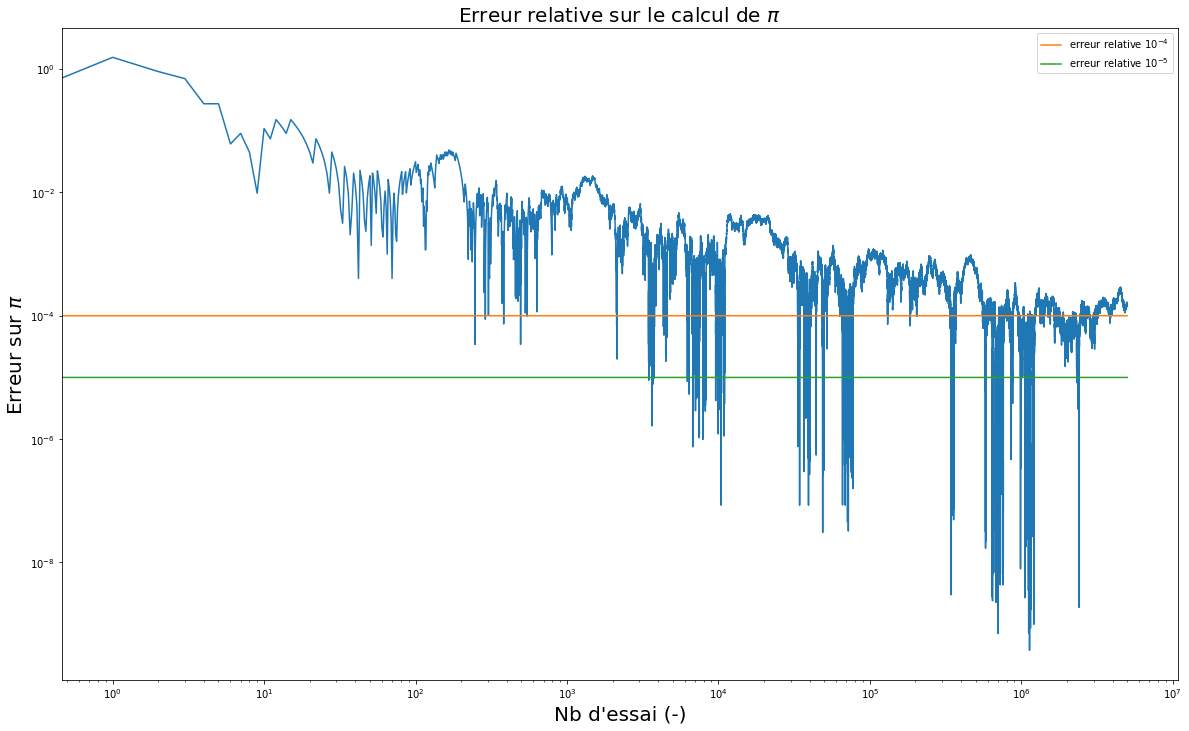

In [6]:
limite_4 = [pow(10, -4) for i in range(tirages)] # limites à 10^{-4}
limite_6 = [pow(10, -5) for i in range(tirages)] # limites à 10^{-6}

pl.figure(figsize=(20, 12))
plt.plot(x, err_pi_quart)
plt.plot(x, limite_4, label="erreur relative $10^{-4}$")
plt.plot(x, limite_6, label="erreur relative $10^{-5}$")
plt.title("Erreur relative sur le calcul de $\pi$", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Erreur sur $\pi$", fontsize=20)
#plt.ylim(0,0.1)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()


Temps de calcul

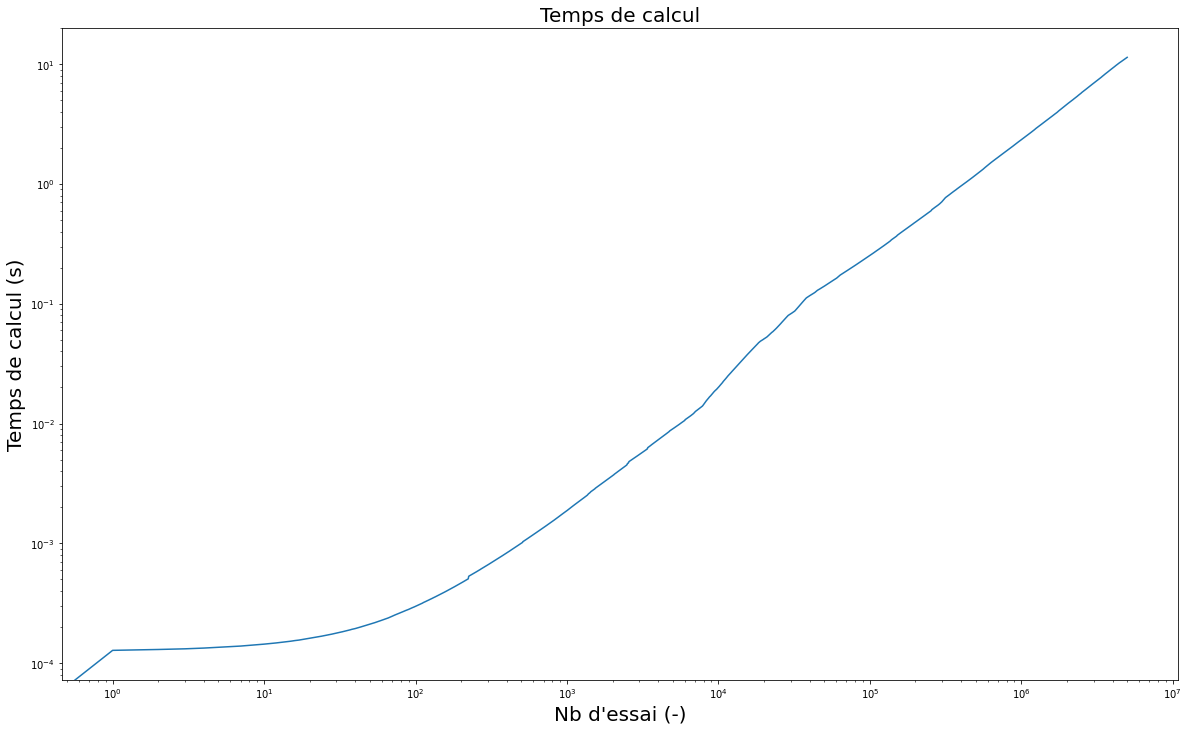

In [8]:
pl.figure(figsize=(20, 12))
plt.plot(x, t_calcul_quart)
plt.title("Temps de calcul", fontsize=20)
plt.xlabel("Nb d'essai (-)", fontsize=20)
plt.ylabel("Temps de calcul (s)", fontsize=20)
plt.yscale("log")
plt.xscale('log')
plt.show()

Le temps de calcul augmente très rapidement avec le nombre d'esssai. La courbe en échelle log/log est à peu près une droite, cela montre que le temps varie selon une loi de puissance du nombre de tirages. Alors que la précision sur la valeur n'augmente que très peu avec le nombre d'essai. Il est de plus en plus long d'augmenter la précision sur le calcul et se rapprocher de la valeur réelle de $\pi$

On visualise maintenant les tirages aléatoires sur un quart de cercle:

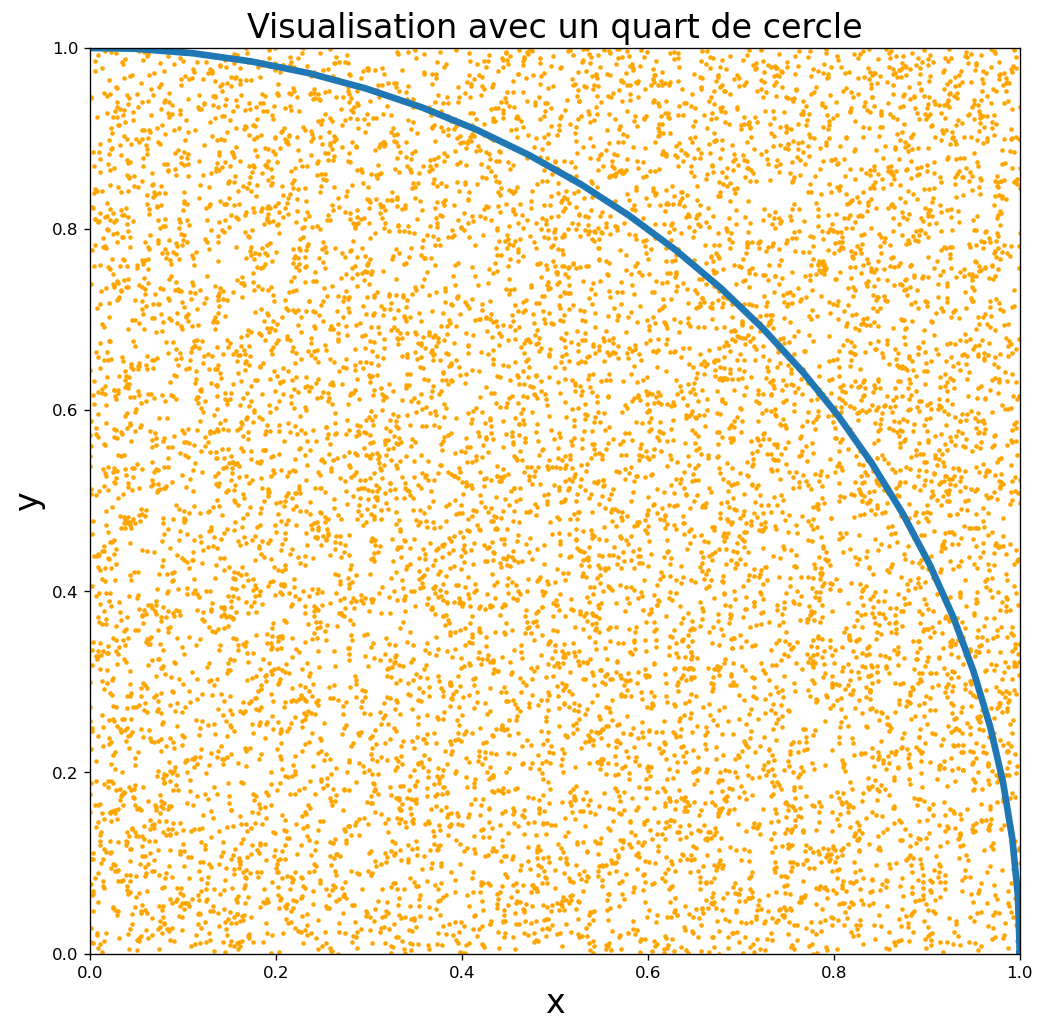

In [13]:
# Calcul du cercle 
theta = np.linspace(0, 2*np.pi, 100)
r = 1
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)


fig = plt.figure(figsize=(10,10),dpi=120)
plt.plot(x1, x2, linewidth=4)
plt.title("Visualisation avec un quart de cercle", fontsize=20)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("x", fontsize=20) 
plt.ylabel("y", fontsize=20)
plt.scatter(R1, R2, color="orange", s=3)



On réalise uouvelle estimation de $\pi$ avec un grand nombre de répétition afin d'améliorer l'estimation statistique, cela permet de faire une moyenne sur un grand nombre de tirage et d'estimer l'incertitude sur le calcul avec l'écart-type $\sigma$:

In [7]:
cercle = 0
tirage_1 = 0
tirage_2 = 0
nombre_tirages = 1000000
repetition = 10000

pi_result = np.zeros(repetition)
pi_error = np.zeros(repetition)
calcul_start = time.time()

for i in range(0, repetition):
    cercle = 0
    for j in range(0, nombre_tirages):
        tirage_1 = random()
        tirage_2 = random()
            
        if est_dans_cercle(tirage_1, tirage_2, 1):
            cercle += 1
        
    pi_result[i] = 4*cercle/nombre_tirages

print("Estimation de pi : %.8f +- %.8f"%(pi_result.mean(), pi_result.std()))
print("Temps de calcul : %4.f s"%(time.time() - calcul_start))


Estimation de pi : 3.14160143 +- 0.00165470
Temps de calcul : 3844 s


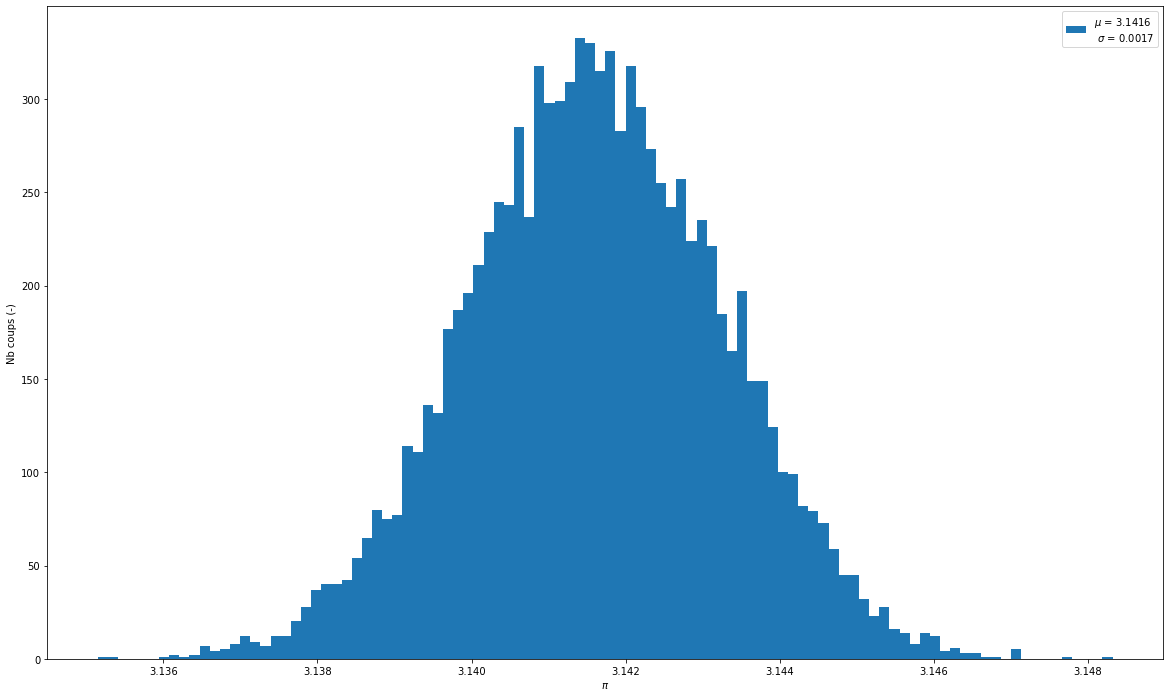

In [8]:
pl.figure(figsize=(20, 12))
plt.hist(pi_result, 100, label="$\mu$ = %4.4f \n $\sigma$ = %4.4f"%(pi_result.mean(), pi_result.std()))
plt.xlabel("$\pi$")
plt.ylabel("Nb coups (-)")
plt.legend()
plt.show()


La distribution se rapproche d'une gaussienne avec la moyenne qui tend vers la valeur de $\pi$ lorsque l'on réalise un grand nombre de tirage.

## Modélisation d'une source de photons 

Dans cette partie l'objectif est de modéliser une émission de photons depuis un point. On commence par une émission isotrope, c'est à dire que la source émet sans direction privilégiée. Pour ça on se place dans un système de coorconnées sphériques, on se place dans le cas où le rayon de la sphère est de 1.

**Cas d'une source isotrope**

Dans un système de coordonnées sphériques $\phi$ varie de 0 à $2\pi$ de façon uniforme. L'angle $\theta$ varie de 0 à $\pi$ mais pas de façon uniforme. On veut que la distribution sur la surface de la sphère soit uniforme (isotrope), l'élément de surface est $dS = r^2 \sin{\theta} d\theta d\phi$, où l'on voit bien que $\phi$ varie de façon uniforme et $\theta$ ne varie pas de façon uniforme. Pour obtenir les variations de $\theta$ on utilise l'inversion de la fonction de répartion. La fonction de répartition de $\theta$ :

$$ F(\Theta) = A \int_0^{\Theta} \sin{\theta} d\theta $$

Finalement l'inversion de la fonction de répartition nous donne $\theta$ en fonction de la fonction de répartition:

$$ \theta = \arccos{(1-2 \times F(\Theta))} $$

La fonction de répartition est par définition définie entre 0 et 1. Si on tire un nombre un nombre entre 0 et 1 cela au même que la fonction de répartition, on peut donc obtenir $\theta$ en fonction d'un nombre R uniformément répartis entre 0 et 1:

$$ \theta = \arccos{(1-2 \times R)} $$

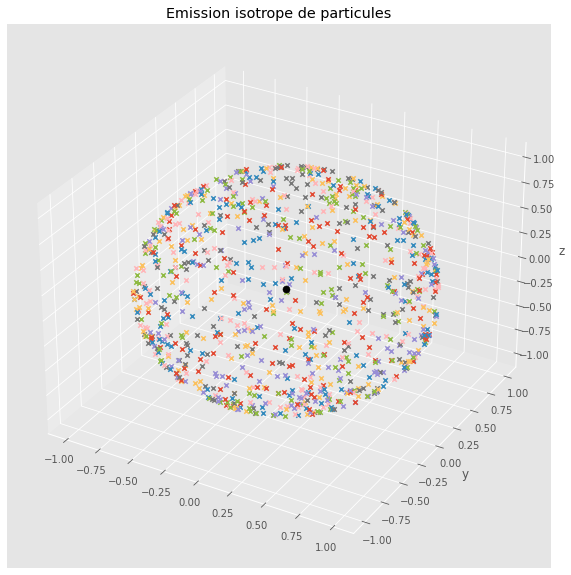

In [32]:
from random import uniform
import matplotlib.pyplot as plt
Nb = 1000
theta = np.zeros(Nb)
phi = np.zeros(Nb)
R = 1

for i in range (Nb):
    theta[i] = np.arccos(1 - 2*uniform(0, 1))
    phi[i] = uniform(0, 2*np.pi)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Emission isotrope de particules")
ax.set_xlabel("")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(0, 0, 0, s=50, color='black')

for i in range(Nb):
    ax.scatter(R*np.sin(theta[i])*np.cos(phi[i]), R*np.sin(theta[i])*np.sin(phi[i]), R*np.cos(theta[i]), marker='x')
plt.show()

**Cas d'une émission collimatée**

On souhaite maintenant faire la modélisation d'une source collimatée étendue de 10° autour de l'axe z (l'axe vertical autour duquel tourne l'angle $\phi$). On réalise la même chose en inversant la fonction de répartition. Dans le cas d'un angle de 10° (10° correspond à 1/18ème de $\pi$) on obtient:

$$ \theta = \arccos{(1-(1-\cos{\frac{\pi}{18}}) R)} $$

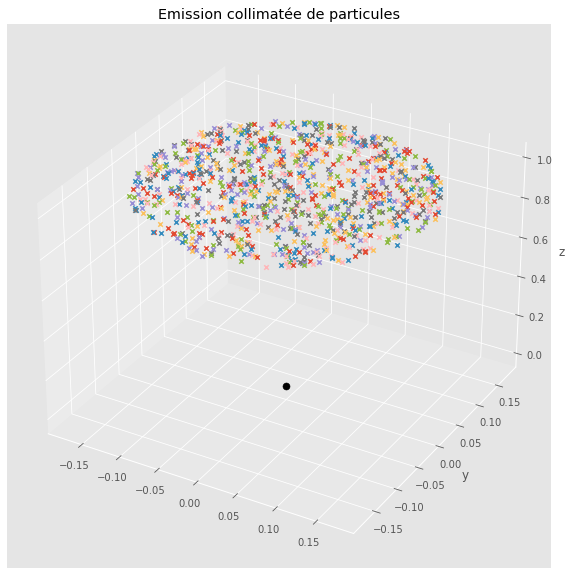

In [33]:
theta_col = np.zeros(Nb)
phi_col = np.zeros(Nb)
R_col = 1

for i in range (Nb):
    theta_col[i] = np.arccos(1-(1-np.cos(np.pi/18))*uniform(0, 1))
    phi_col[i] = uniform(0, 2*np.pi)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Emission collimatée de particules")
ax.set_xlabel("")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(0, 0, 0, s=50, color='black')

for i in range(Nb):
    ax.scatter(R*np.sin(theta_col[i])*np.cos(phi_col[i]), R*np.sin(theta_col[i])*np.sin(phi_col[i]), R*np.cos(theta_col[i]), marker='x')
plt.show()


On observe bien une émission sur une petite portion du cercle autour de l'axe z.

## Distance d'interaction

On souhaite dans cette partie faire des simulations Monte Carlo des distances d'interaction des photons dans la matière (dans une cuve à eau). On utilise pour ça 2 techniques:

* La méthode élémentaire
* La méthode d'inversion de la fonction de répartition





**Méthode d'inversion de la fonction de répartition**

La densité de probabilité d'interaction d'un photon peut être écrite:

$$ dP = Ae^{-\mu x} \mu dx $$

La fonction de répartition est:

\begin{align}
    F(d) &= \int_{0}^{d} dP \nonumber \\
         &= \int_{0}^{d} A \mu e^{-\mu x} dx \nonumber \\
         &= A \mu \Big[ -\frac{1}{\mu} e^{-\mu x} \Big]_{0}^{d} \nonumber \\
         &= A (1 - e^{-\mu d})
\end{align}

Quand la distance tend vers l'infini la fonction de répartition doit être égale à 1. Donc on obtient $A=1$. La fonction de répartition est:

$$ F(d) = (1 - e^{-\mu d}) $$

Comme précédemment on inverse la fonction pour relier un nombre aléatoire R à la distance d'interaction:

\begin{align}
    R &= 1 - e^{-\mu d} \nonumber \\
    -\mu d &= ln(1-R) \nonumber \\
    d &= - \frac{1}{\mu} ln R
\end{align}




Définitions des fonctions et des classes pour les calculs:

In [34]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fonction(x, A, B):
    return A*np.exp(-B*x)


def Chi2_test(data, fit, err):
    chi2 = 0
    ndf = 0
    for i in range(len(data)):
        if err[i]==0:
            chi2 += pow((data[i] - fit[i])/(err[i]+1), 2)
        else:
            chi2 += pow((data[i] - fit[i])/(err[i]), 2)
        ndf += 1
    return chi2, ndf-1

# Classe pour utilisation et analyse des données
class Set_data:
    def __init__(self, energy, energy_name):
        self.energy = energy
        self.energy_name = energy_name
        self.x = None
        self.distance_int = None
        self.data_entries = None
        self.data_err = None
        self.binscenters = None
        self.parameters = None
        self.fit_exp = None
        self.chi2 = None
        self.ndf = None

    def get_chi2(self):
        return self.chi2, self.ndf
    
    def get_mu(self):
        return self.parameters[1]

    def set_distance_int(self, distance_int):
        self.distance_int = distance_int

    def fit(self):
        self.x = np.linspace(0, max(self.distance_int),
                             int(np.sqrt(len(self.distance_int))))
        self.data_entries, self.bins_1 = np.histogram(
            self.distance_int, bins=self.x)
        self.data_err = self.data_entries/np.sqrt(self.data_entries+0.001)
        self.binscenters = np.array(
            [0.5 * (self.x[i] + self.x[i+1]) for i in range(len(self.x)-1)])
        self.parameters, self.covariance = curve_fit(
            fonction, self.binscenters, self.data_entries)
        self.fit_exp = fonction(self.x, self.parameters[0], self.parameters[1])
        self.chi2, self.ndf = Chi2_test(
            self.data_entries, self.fit_exp, self.data_err)

    def affiche(self):
        print("Nom:", self.energy_name)
        print(self.data_entries)
        print(self.data_err)
        print("Chi2 :", Chi2_test(self.data_entries, self.fit_exp, self.data_err))

    def plot(self):
        plt.bar(self.binscenters, self.data_entries,
                width=self.x[1] - self.x[0], color='navy', label=self.energy_name)
        plt.plot(self.x, self.fit_exp, label='fit : $x_0 e^{-\mu x}$ \n$x_0$ = %4.1f \n$\mu_{%s}$ = %4.4f \n$\chi^{2} /ndf$ = %4.1f/%4.0f' %(self.parameters[0], self.energy_name, self.parameters[1], self.chi2, self.ndf), color='red')
        plt.xlabel("Distance (cm)")
        plt.ylabel("Count")
        plt.legend(loc=1, prop={'size': 16})

On commence par importer les librairies nécessaire, les variables, constantes, l'extraction des données utilisées et l'interpolation des données:

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import uniform
import time

Nb = 10000
distance_int = np.zeros((4, Nb))
R = np.zeros((4, Nb))
rho_eau = 1

# Extraction des données
Data = pd.read_excel('eau.xlsx', sheet_name="Feuil1")
Energy = Data['Energy (MeV)'].values
Att = Data['µ/ρ (cm2/g)'].values
En = Data['µen/ρ (cm2/g)'].values

# Interpolation aux valueurs d'énergies d'intérêt
E_int = np.array([0.017, 0.064, 0.1, 10])
E_int_name = np.array(["17 keV", "64 keV", "100 keV", "10 MeV"])
muatt_int = np.interp(E_int, Energy, Att) 
muen_int = np.interp(E_int, Energy, En)

On réalise le tirage des nombres aléatoire et le calcul des distances:

In [36]:
t1 = time.time()
for energy in range(0, 4):
    for i in range(Nb):
        R[energy][i] = uniform(0, 1)
        distance_int[energy][i] = -(1/(muatt_int[energy]*rho_eau)) * np.log(R[energy][i]) 
t1f = time.time()

On définis les différents objets à l'aide de la classe Set_data qui représentent les données. Puis on réalise le fit sur les données avec un fit exponentiel avec la fonction curve_fit de Numpy. Ce fit en exponentiel nous permet d'obtenir la valeur du coefficient d'atténuation des photons calculée grâce à la méthode Monte Carlo:

In [37]:
data1 = Set_data(energy=0.017, energy_name='17 keV')
data1.set_distance_int(distance_int[0])
data1.fit()
data2 = Set_data(energy=0.064, energy_name='64 keV')
data2.set_distance_int(distance_int[1])
data2.fit()
data3 = Set_data(energy=0.1, energy_name='100 keV')
data3.set_distance_int(distance_int[2])
data3.fit()
data4 = Set_data(energy=10, energy_name='10 MeV')
data4.set_distance_int(distance_int[3])
data4.fit()

<ipython-input-34-69108c7e8e8e>:6: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


On trace l'histogramme des distances d'interactions calculées précédemment. On représente le fit exponentiel sur les données afin d'extraire la valeur du coefficient d'atténuation des photons:

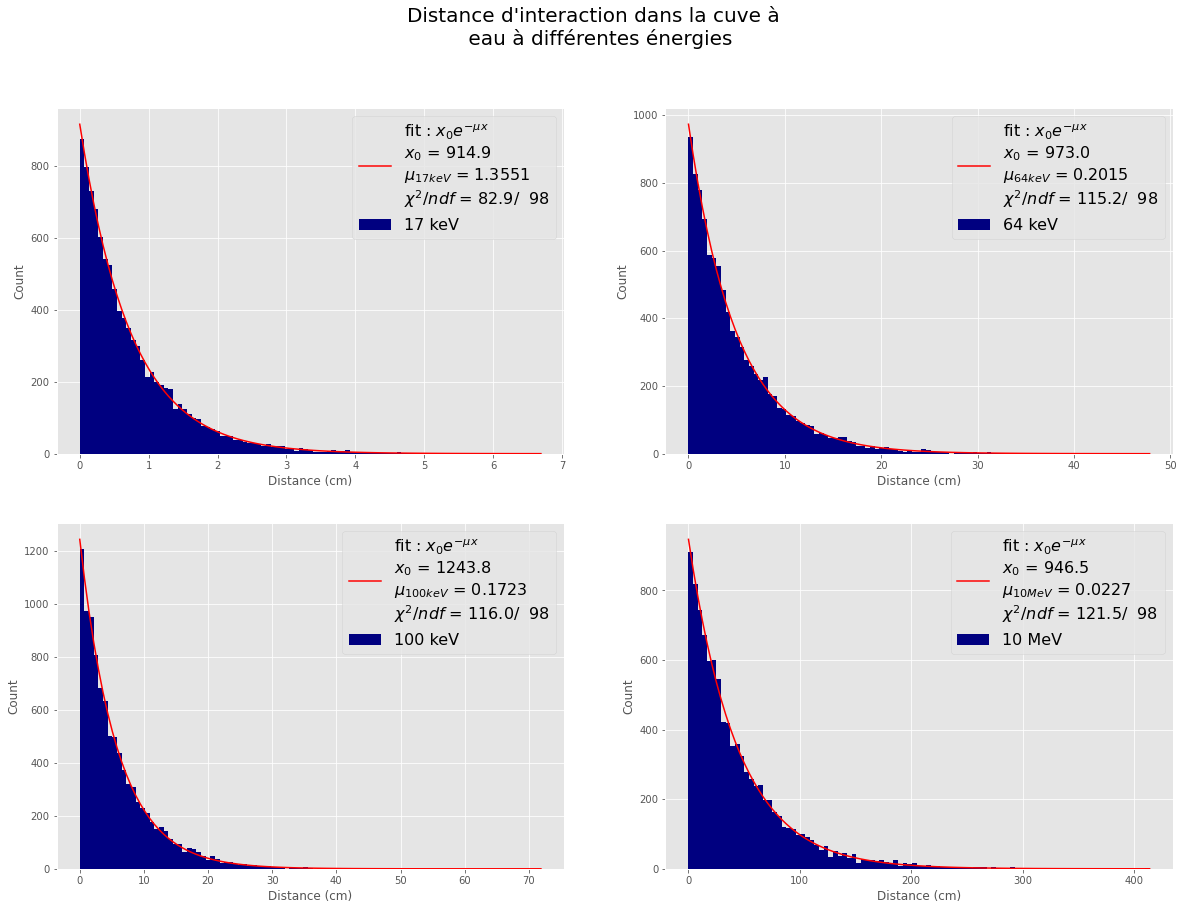

In [38]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
plt.suptitle("Distance d'interaction dans la cuve à \n eau à différentes énergies", fontsize=20)
data1.plot()
plt.subplot(2, 2, 2)  
data2.plot()
plt.subplot(2, 2, 3)  
data3.plot()
plt.subplot(2, 2, 4)  
data4.plot()
plt.show()

In [39]:
print("Ecart valeur réelle à 17 keV: ", 100*abs(muatt_int[0]-data1.get_mu())/muatt_int[0], "%")
print("Ecart valeur réelle à 64 keV: ", 100*abs(muatt_int[1]-data2.get_mu())/muatt_int[1], "%")
print("Ecart valeur réelle à 100 keV: ", 100*abs(muatt_int[2]-data3.get_mu())/muatt_int[2], "%")
print("Ecart valeur réelle à 10 MeV: ", 100*abs(muatt_int[3]-data4.get_mu())/muatt_int[3], "%")
print ('Temps de calcul : %5.3g s \n \n' % (t1f - t1))

Ecart valeur réelle à 17 keV:  2.0667909933981865 %
Ecart valeur réelle à 64 keV:  0.008753648283374636 %
Ecart valeur réelle à 100 keV:  0.9092311081854646 %
Ecart valeur réelle à 10 MeV:  2.2774570381964137 %
Temps de calcul : 0.113 s 
 



Les valeurs obtenues sont assez proches (de l'ordre de 1%) des valeurs directement données dans les tables des coefficients d'atténuation

**Méthode élémentaire**

Seconde technique en utilisant une méthode élémentaire. Un photon a une certaine probabilité d'interagir dans la matière. Cette probabilité est constante dans le temps, elle ne varie pas. La probabilité d'interaction d'un photon dans un certain intervalle dx est donné par:

$$ dP = \mu dx $$

Pour calculer la distance d'interaction d'un photon avec la méthode Monte Carlo on tire un nombre aléatoire $R_1$ entre 0 et 1. Si ce nombre est plus petit que la probabilité d'interaction $\mu dx$ alors le photon a interagit et note donc la distance. Si le nombre est plus grand que la probabilité d'interaction alors le photon n'a pas interagit, on modifie la distance et on retire un nombre. On recommence jusqu'à ce que le photon interagisse.

In [40]:

Nb = 10000
distance_int_1 = np.zeros((4, Nb))
Nb_calcul = np.zeros((4, Nb))
R_1 = np.zeros((4, Nb))
rho_eau = 1
dx = 1
step = 0.01  # en cm

t2 = time.time()
for energy in range(0, 4):
    for i in range(Nb):
         interaction = False
         dx = 0
         while (interaction == False):
             R_1 = uniform(0, 1)
             dx += step
             Nb_calcul[energy][i] += 1
             if (R_1 <= muatt_int[energy]*step):
                distance_int_1[energy][i] = dx
                interaction = True
t2f = time.time()      

Construction des objets, remplissage des valeurs et fit des données comme précédemment:

<ipython-input-34-69108c7e8e8e>:6: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-B*x)


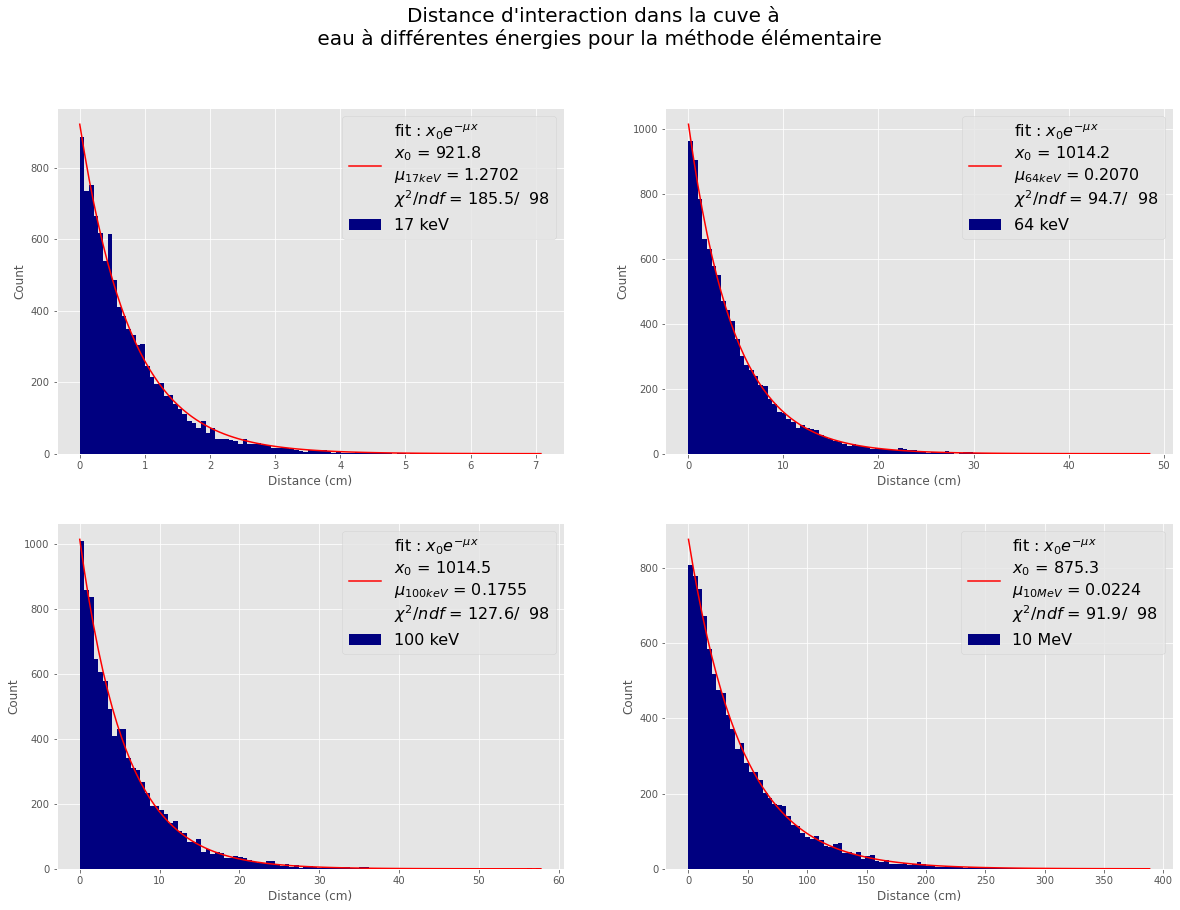

Nombre de calcul moyen par photons 75.301 +- 73.841
Ecart valeur réelle:  4.327909257127271 %
Ecart valeur réelle:  2.747807836084557 %
Ecart valeur réelle:  2.8085249430932877 %
Ecart valeur réelle:  0.7422899211104074 %
Temps de calcul méthode élémentaire :  72.2 s
Temps de calcul méthode par fonction de répartition: 0.113 s 
 

Rapport des temps de calcul:  640


In [41]:
data_1 = Set_data(energy=0.017, energy_name='17 keV')
data_1.set_distance_int(distance_int_1[0])
data_1.fit()
data_2 = Set_data(energy=0.064, energy_name='64 keV')
data_2.set_distance_int(distance_int_1[1])
data_2.fit()
data_3 = Set_data(energy=0.1, energy_name='100 keV')
data_3.set_distance_int(distance_int_1[2])
data_3.fit()
data_4 = Set_data(energy=10, energy_name='10 MeV')
data_4.set_distance_int(distance_int_1[3])
data_4.fit()

plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
plt.suptitle("Distance d'interaction dans la cuve à \n eau à différentes énergies pour la méthode élémentaire", fontsize=20)
data_1.plot()
plt.subplot(2, 2, 2)  
data_2.plot()
plt.subplot(2, 2, 3)  
data_3.plot()
plt.subplot(2, 2, 4)  
data_4.plot()
plt.show()

print("Nombre de calcul moyen par photons %4.3f +- %4.3f"%(Nb_calcul[0].mean(), Nb_calcul[0].std()))

print("Ecart valeur réelle: ", 100*abs(muatt_int[0]-data_1.get_mu())/muatt_int[0], "%")
print("Ecart valeur réelle: ", 100*abs(muatt_int[1]-data_2.get_mu())/muatt_int[1], "%")
print("Ecart valeur réelle: ", 100*abs(muatt_int[2]-data_3.get_mu())/muatt_int[2], "%")
print("Ecart valeur réelle: ", 100*abs(muatt_int[3]-data_4.get_mu())/muatt_int[3], "%")
print('Temps de calcul méthode élémentaire : %5.3g s' % (t2f - t2))
print ('Temps de calcul méthode par fonction de répartition: %5.3g s \n \n' % (t1f - t1))
print("Rapport des temps de calcul: %4.3d"%((t2f - t2)/(t1f - t1)))


Les deux techniques sont équivalentes, c'est à dire qu'elles permettent d'arriver au même résultat et avec des précisions similaires, l'un n'est pas meilleure que l'autre. Cependant il existe une très grande différence d'efficacité des 2 méthodes. La méthode élémentaire est une methode bien plus longue car elle ne fait pas un seul caclul par photons (comme la méthode par inversion de la fonction de répartition) mais beaucoup de calcul par photon. Par définitions elle fait un calcul pour chaque pas jusqu'à ce que le photon interagissent. On représente ci-dessous les histogrammes du nombre de calcul par photons:

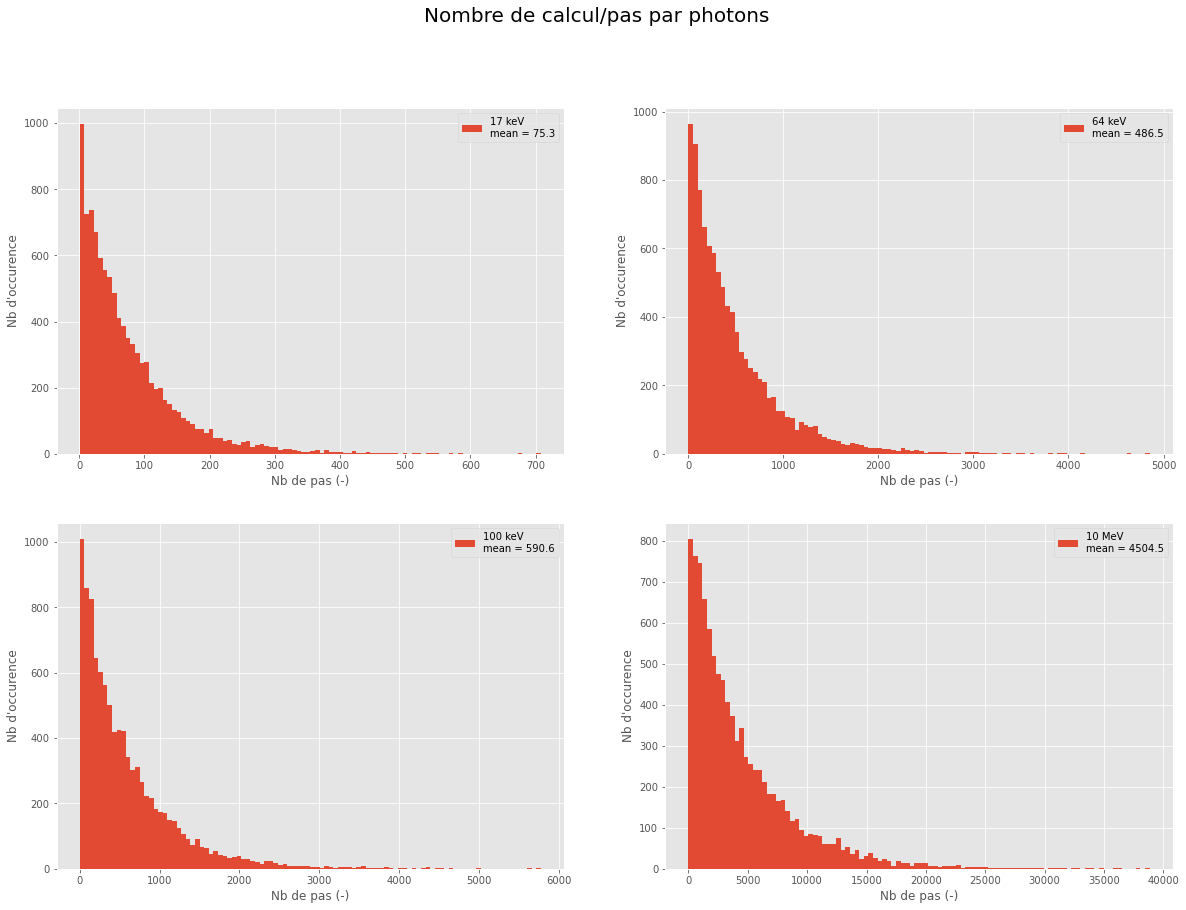

In [42]:
plt.figure(figsize=(20, 14))
plt.subplot(2, 2, 1)
plt.suptitle("Nombre de calcul/pas par photons", fontsize=20)
plt.hist(Nb_calcul[0], bins=int(np.sqrt(Nb)), label="%s\nmean = %4.1f"%(E_int_name[0], Nb_calcul[0].mean()))
plt.xlabel("Nb de pas (-)")
plt.ylabel("Nb d'occurence")
plt.legend()
plt.subplot(2, 2, 2)  
plt.hist(Nb_calcul[1], bins=int(np.sqrt(Nb)), label="%s\nmean = %4.1f"%(E_int_name[1], Nb_calcul[1].mean()))
plt.xlabel("Nb de pas (-)")
plt.ylabel("Nb d'occurence")
plt.legend()
plt.subplot(2, 2, 3)  
plt.hist(Nb_calcul[2], bins=int(np.sqrt(Nb)), label="%s\nmean = %4.1f"%(E_int_name[2], Nb_calcul[2].mean()))
plt.xlabel("Nb de pas (-)")
plt.ylabel("Nb d'occurence")
plt.legend()
plt.subplot(2, 2, 4)  
plt.hist(Nb_calcul[3], bins=int(np.sqrt(Nb)), label="%s\nmean = %4.1f"%(E_int_name[3], Nb_calcul[3].mean()))
plt.xlabel("Nb de pas (-)")
plt.ylabel("Nb d'occurence")
plt.legend()
plt.show()


On observe une décroissance exponentielle: il y a beaucoup de photons où il y a peu de pas de calcul et peu où il y a de beaucoup de pas. Cela est logique puisque la loi d'atténuation est une exponentielle décroissante. 
On remaque une différence importante entre les énergie, cela s'explique par les coefficients d'atténuation et donc les probabilités plus faibles pour les plus hautes énergies. Le temps de calcul dépend donc directement de l'énergie des photons.

## Type d'interaction 

Dans cette partie on souhaite déterminer, à partir de la génération de nombres aléatoires, le type d'interaction lorsqu'un photon interagit dans la matière (ici de l'eau). Pour ça on va faire le calcul à l'aides des coefficients d'atténuation des photons. La probabilité d'interaction d'un photon dans un élément dx est donné par:

$$ dP = \mu dx $$

A cause de la propriété additives des probabilités, la probabilité totale d'interaction d'un photon dans la matière est la somme des probabilités des probabilités de faire chaque type d'interactions: 

$$ P_{tot} = P_{Rayleigh} + P_{Photo-electrique} + P_{Compton} + P_{Paire} $$

Le coefficient d'atténuation total des photons est donc la somme des coefficients d'atténuation des photons pour chaque interactions:

$$ \mu_{tot} = \mu_{Rayleigh} + \mu_{Photo-electrique} + \mu_{Compton} + \mu_{Paire} $$

On va donc tirer un nombre aléatoire et suivant les valeurs obtenues on va avoir un type d'interaction donné. On tire un nombre aléatoire R compris entre 0 et 1. Les conditions sur ce nombre aléatoire R vont être directement reliées aux probabilité d'interaction des photons dans la matière donc au coefficient d'atténuation:

*Si $R  \in [0; \frac{\mu_{Rayleigh}}{\mu_{tot}}]$ alors on a une diffusion Rayleigh

*Si $R  \in [\frac{\mu_{Rayleigh}}{\mu_{tot}}; \frac{\mu_{photoélectrique} + \mu_{Rayleigh}}{\mu_{tot}}]$ alors on a un effet photoélectrique

*Si $R  \in [\frac{\mu_{photoélectrique}+\mu_{Rayleigh}}{\mu_{tot}}; \frac{\mu_{photoélectrique} + \mu_{Rayleigh} + \mu_{Compton}}{\mu_{tot}}]$ alors on a une diffusion Compton

*Si $R  > \frac{\mu_{photoélectrique} + \mu_{Rayleigh} + \mu_{Compton}}{\mu_{tot}}$ alors on a une création de paire

On place une conditions supplémentaire sur la création de paire. En effet elle n'est possible que si l'énergie est suffisante est donc: $E > 1.022 MeV$. On commence par la définitions des constantes et des variables:


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform


# Constantes 
Nb = 100000
mu_rho_Rayleigh = [0.1134, 0.01236, 0.005338, 0.000000561]
mu_rho_photo_elec = [0.9144, 0.01206, 0.002762, 0.0000001386]
mu_rho_compton = [0.1733, 0.1752, 0.1625, 0.01704]
mu_rho_pair = [0, 0, 0, 0.004699]
mu_rho_tot = [mu_rho_Rayleigh[i] + mu_rho_compton[i] + mu_rho_pair[i] + mu_rho_photo_elec[i] for i in range(4)]
E_int = np.array([0.017, 0.064, 0.1, 10])
E_int_name = np.array(["17 keV", "64 keV", "100 keV", "10 MeV"])


# Variables
Nb_photo = np.zeros(4)
Nb_compton = np.zeros(4)
Nb_paire = np.zeros(4)
Nb_Ray = np.zeros(4)
R_1 = np.zeros(4)

Tirage des nombres aléatoires:

In [44]:
for energy in range(4):
    for i in range(Nb):  
        #R_1[energy] = uniform(0, 1)
        R_2 = uniform(0, 1)
        if (R_2 < mu_rho_Rayleigh[energy]/mu_rho_tot[energy]):
            Nb_Ray[energy] += 1
        if (R_2 > mu_rho_Rayleigh[energy]/mu_rho_tot[energy] and R_2 < (mu_rho_Rayleigh[energy]+mu_rho_photo_elec[energy])/mu_rho_tot[energy]):
            Nb_photo[energy] += 1
        if (R_2 > (mu_rho_Rayleigh[energy]+mu_rho_photo_elec[energy])/mu_rho_tot[energy] and R_2 < (mu_rho_compton[energy]+mu_rho_photo_elec[energy]+mu_rho_Rayleigh[energy])/mu_rho_tot[energy]):
            Nb_compton[energy] += 1
        if (R_2 > (mu_rho_compton[energy]+mu_rho_photo_elec[energy]+mu_rho_Rayleigh[energy])/mu_rho_tot[energy] and E_int[energy] > 1.022):
            Nb_paire[energy] += 1


Plot des résultats dans un histogramme en bar: 

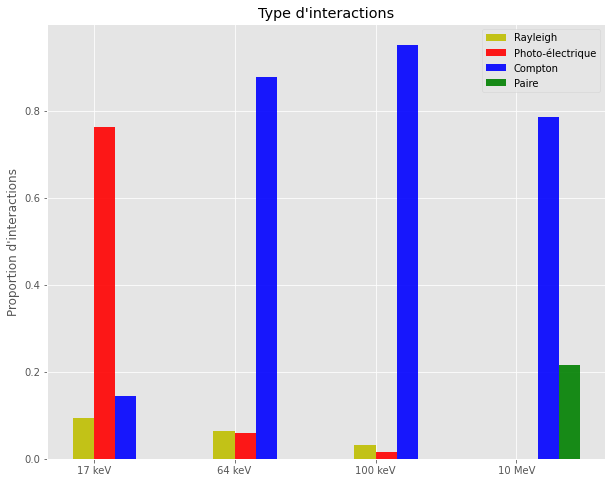

In [45]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(4)
bar_width = 0.15
opacity = 0.9
ax.bar(index, Nb_Ray/Nb, bar_width, alpha=opacity, color='y', label='Rayleigh')
ax.bar(index+bar_width, Nb_photo/Nb, bar_width, alpha=opacity, color='r', label='Photo-électrique')
ax.bar(index+2*bar_width, Nb_compton/Nb, bar_width, alpha=opacity, color='b', label='Compton')
ax.bar(index+3*bar_width, Nb_paire/Nb, bar_width, alpha=opacity, color='g', label='Paire')
ax.set_title("Type d'interactions")
ax.set_ylabel("Proportion d'interactions")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(E_int_name)
ax.legend()
plt.show()

On observe que à basse énergie c'est bien l'effet photoélectrique qui domine les interactions des photons dans la matière. A plus haute énergie c'est la diffusion Compton qui domine. Puis enfin à plus haute énergie on voit apparaitre la création de paires. La diffusion Rayleigh est un processus plutôt anecdotique, notamment lorsque l'on monte en énergie. C'est bien le comportement qu'on observe sur les courbes des coefficients d'atténuation des photons dans la matière (voir courbe sur NIST XCOM, https://physics.nist.gov/cgi-bin/Xcom/xcom3_2).